# **Logistic Regression (Binary Classification [codebasics])**
**Predicting if a person would buy life insurnace based on his age using logistic regression** [[youtube (19min)]](https://www.youtube.com/watch?v=zM4VZR0px8E)  [[github - code basics]](https://github.com/codebasics/py/blob/master/ML/7_logistic_reg/7_logistic_regression.ipynb)

It is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't)

## Pre-requisite

### directory creation and cleanup, load lib, git clone

In [22]:
import os
import shutil

In [23]:
SRC_LOC='/content/py/ML/7_logistic_reg/'
SRC_FILES_DIRS = SRC_LOC + '*'
DST_LOC='/content/'
WORKING_DIR=DST_LOC+'02_logistic_regression/'
!python --version


Python 3.7.12


In [24]:
shutil.rmtree('/content')
os.mkdir('/content')
os.mkdir(WORKING_DIR)

os.chdir("/content/")
CWD = os.getcwd()
print(f"CWD={CWD}")

if os.path.isdir('py'):
  shutil.rmtree('py')

!git clone https://github.com/codebasics/py

os.system('cp -R ' + SRC_FILES_DIRS + ' ' + WORKING_DIR) 

os.chdir(WORKING_DIR)

CWD=/content
Cloning into 'py'...
remote: Enumerating objects: 2873, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 2873 (delta 33), reused 52 (delta 18), pack-reused 2801
Receiving objects: 100% (2873/2873), 196.64 MiB | 33.15 MiB/s, done.
Resolving deltas: 100% (1112/1112), done.
Checking out files: 100% (1388/1388), done.


In [25]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Load/Split Data, showing dataframe

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv("insurance_data.csv")
print(f"fd.head()=\n{df.head()}",f"\nSize of dataFrame = {df.shape}")


fd.head()=
   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1 
Size of dataFrame = (27, 2)


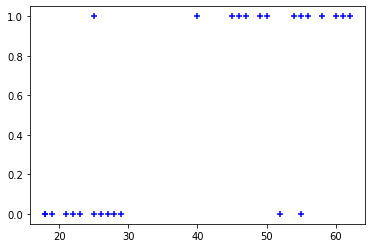

In [28]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='blue')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [30]:
print(f"X_test(cnt={len(X_test)})=\n{X_test}")

X_test(cnt=6)=
    age
11   28
2    47
3    52
0    22
26   23
24   50


## **sklearn _ LogisticRegression - Training**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
X_test

,age
11,28
2,47
3,52
0,22
26,23
24,50


## **sklearn _ LogisticRegression - Prediction**
 
Ref - [sklearn 中 predict_proba用法（註意和predict的區別）](https://blog.csdn.net/u011630575/article/details/79429757)

predict_proba返回的是一個 n 行 k 列的數組， 第 i 行 第 j 列上的數值是糢型預測 第 i 個預測樣本為某個標簽的概率，並且每一行的概率和為1

In [35]:
y_predicted = model.predict(X_test)
print(f"X_test=\n{X_test}")
print(f"y_predicted={y_predicted}")

X_test=
    age
11   28
2    47
3    52
0    22
26   23
24   50
y_predicted=[0 1 1 0 0 1]


In [36]:
model.predict_proba(X_test)

array([[0.7630897 , 0.2369103 ],
       [0.17807911, 0.82192089],
       [0.0962409 , 0.9037591 ],
       [0.88309226, 0.11690774],
       [0.86760954, 0.13239046],
       [0.12394493, 0.87605507]])

In [37]:
model.score(X_test,y_test)

0.8333333333333334

<img src="https://github.com/codebasics/py/raw/master/ML/1_linear_reg/linear_equation.png" width="600">

**model.coef_** : **m** in y=m*x + b  equation

**model.intercept_** : **b** in y=m*x + b equation

In [38]:
import numpy as np
m = model.coef_
b = model.intercept_

print(f"m={np.round(m,3)}, \nb={np.round(b,3)}")

m=[[0.142]], 
b=[-5.147]


## Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

## Lets defined ***sigmoid function*** now and do the math with hand

In [39]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [40]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [41]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [42]:
age = 43
prediction_function(age)

0.568565299077705

**0.485 is more than 0.5 which means person with 43 will buy the insurance**